# **Analizando los Salarios en Ciencia de Datos en 2023**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ds_salaries.csv')
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


**Limpieza de datos con Python**

In [2]:
#Detección y eliminación de valores duplicados
duplicados = df.duplicated().sum()
print(duplicados)

#en este caso, no considere correcto borrar los duplicados, ya que bajo mi entendimiento, los datos fueron recopilados de ai-jobs.net, entonces podria
#tratarse simplemente de trabajadores distintos con los mismos datos, ademas, borrar los duplicados seria borrar aproximadamente 1/3 de los datos totales
#y no lo considero correcto ya que podria sesgar los resultados y  afectar la validez del análisis.

1171


In [3]:
#Verificación y ajuste de tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
#Ajustar tipos de datos para mejor manipulacion
col_categorias = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                  'employee_residence', 'company_location', 'company_size']

for i in col_categorias:
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   int64   
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   category
 4   salary              3755 non-null   int64   
 5   salary_currency     3755 non-null   category
 6   salary_in_usd       3755 non-null   int64   
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   int64   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
dtypes: category(7), int64(4)
memory usage: 152.4 KB


In [5]:
#Consistencia en valores categóricos
for i in col_categorias:
  df[i] = df[i].str.upper()

df['job_title'] = df['job_title'].str.title()

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Ml Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Ml Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
#Manejo de valores faltantes
df.isnull().sum()

#no existen valores nulos

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


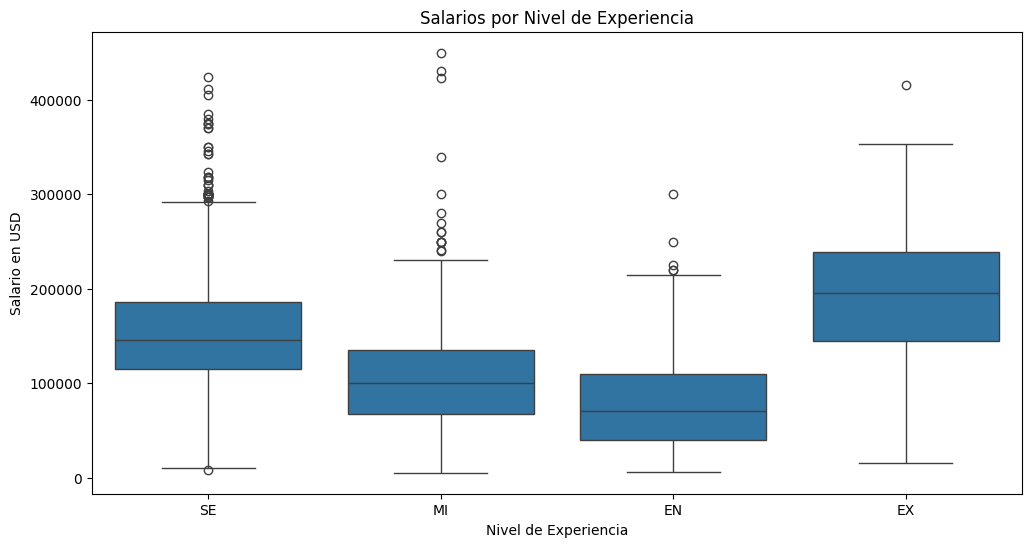

In [7]:
#Detección de datos anómalos

#voy a usar un grafico para identificar datos inusuales mas facilmente, en este caso los salarios por nivel de experiencia
# Boxplot para visualizar salarios por nivel de experiencia (SE: Senior, MI: Mid, EN: Junior, EX: Expert)
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')

plt.show()


In [8]:
mid = df[df['experience_level'] == 'MI']
top_mid = mid.sort_values('salary_in_usd', ascending = False)

top_mid.head(7)

#En mi grafico, me llamo la atencion el salario de mas de 400.000 dolares de algunos trabajadores MID, ya que iba demasiado por arriba de lo esperado
#sin embargo, decidi mantenerlos ya que es relativamente una pequeña cantidad de salarios anormalmente altos, ademas, hay razones que podrian justificar
#el salario alto, como los trabajos siendo Full-Time y presenciales y tal vez se situan en ciudades costosas de los Estados Unidos o Gran Bretaña

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
845,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M
190,2023,MI,FT,Machine Learning Engineer,300000,USD,300000,US,0,US,M
325,2023,MI,FT,Machine Learning Engineer,280700,USD,280700,US,100,US,M
3538,2021,MI,CT,Ml Engineer,270000,USD,270000,US,100,US,L


**Exploración de datos con Python**

Visualizaciones Exploratorias Univariadas

Se puede observar que el Senior es el nivel de experiencia más común en el conjunto de datos.


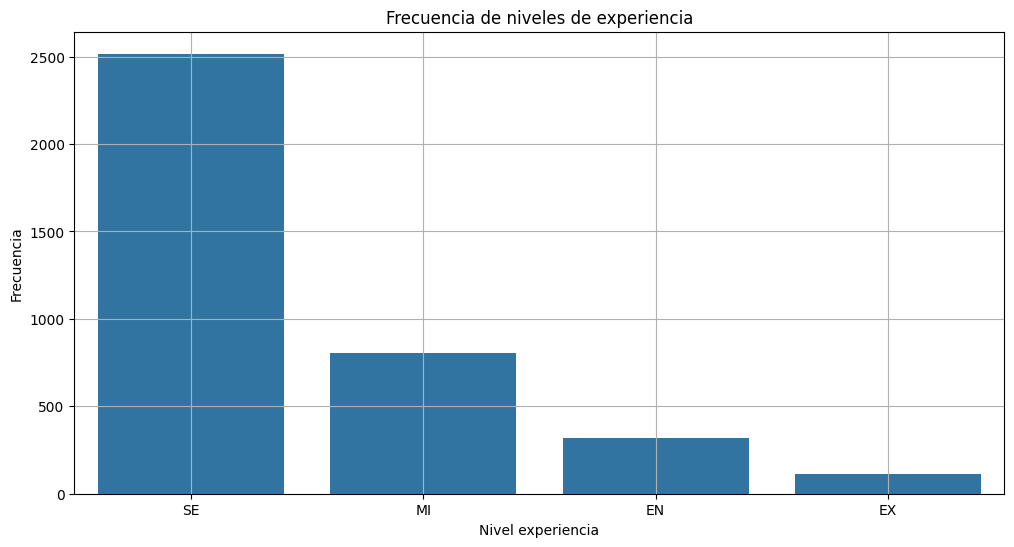

In [9]:
#gráfico de barras, muestra frecuencia de cada nivel de experiencia
plt.figure(figsize=(12,6))
sns.countplot(x='experience_level', data=df)
plt.title('Frecuencia de niveles de experiencia')
plt.xlabel('Nivel experiencia')
plt.ylabel('Frecuencia')
plt.grid()

print('Se puede observar que el Senior es el nivel de experiencia más común en el conjunto de datos.')

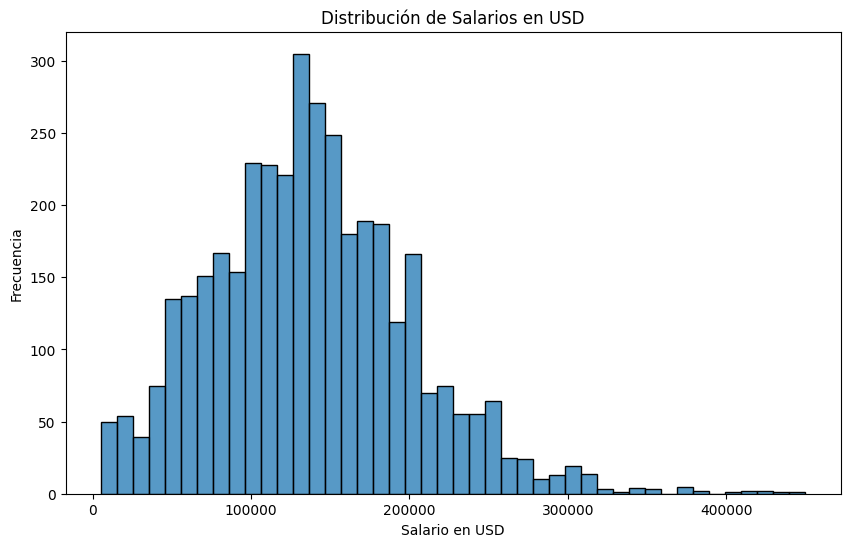

Se muestra que la gran mayoria de salarios se halla entre el rango de 100k-200k anuales.


In [10]:
#histograma que muestra la frecuencia de los salarios
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'])
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()

print('Se muestra que la gran mayoria de salarios se halla entre el rango de 100k-200k anuales.')

Visualizaciones exploratorias multivariadas

Se muestra que los trabajadores expertos (EX), son en promedio los mejores remunerados, especialmente en medianas y grandes empresas


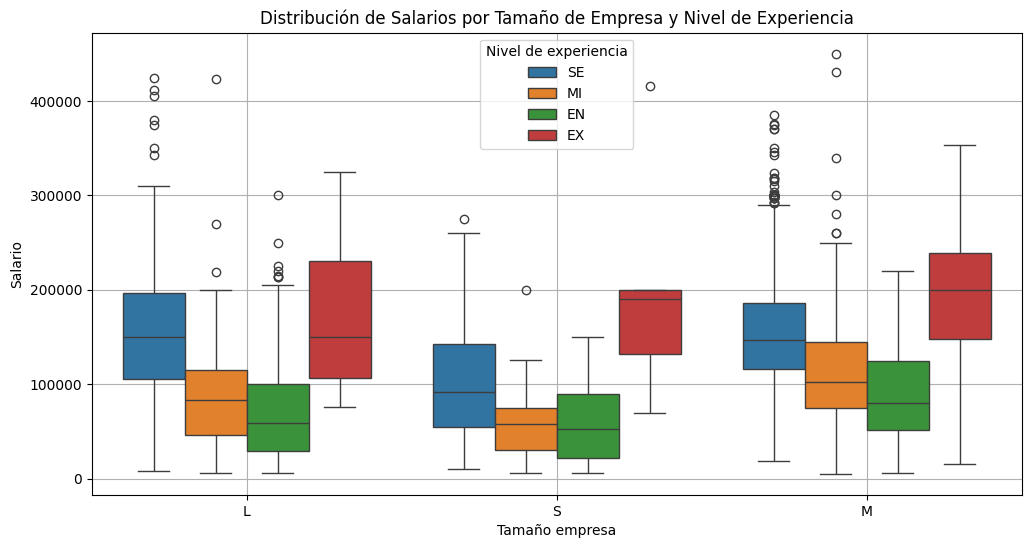

In [11]:
#este grafico muestra cómo varía el salario segun el nivel de experiencia y el el tamaño de la empresa
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', hue='experience_level')
plt.title('Distribución de Salarios por Tamaño de Empresa y Nivel de Experiencia')
plt.xlabel('Tamaño empresa')
plt.ylabel('Salario')
plt.legend(title='Nivel de experiencia')
plt.grid()

print('Se muestra que los trabajadores expertos (EX), son en promedio los mejores remunerados, especialmente en medianas y grandes empresas')

Este grafico ayuda a detectar patrones en el trabajo remoto entre las empresas, por ejemplo en las empresas medianas es mas popular 
el trabajo presencial, mientras que en las grandes empresas pareceria estar distribuido mas equitativamente siendo los trabajos remotos 
los que mas tienen empleados contratados


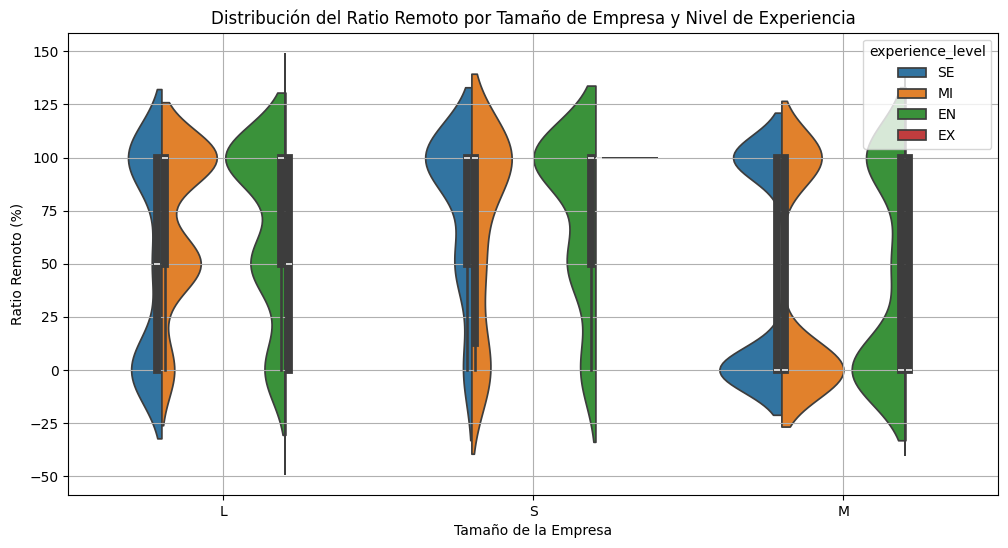

In [12]:
#distribución del radio remoto según el tamaño de la empresa y el nivel de experiencia.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='company_size', y='remote_ratio', hue='experience_level', split=True)
plt.title('Distribución del Ratio Remoto por Tamaño de Empresa y Nivel de Experiencia')
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Ratio Remoto (%)')
plt.grid()

print('Este grafico ayuda a detectar patrones en el trabajo remoto entre las empresas, por ejemplo en las empresas medianas es mas popular \nel trabajo presencial, mientras que en las grandes empresas pareceria estar distribuido mas equitativamente siendo los trabajos remotos \nlos que mas tienen empleados contratados')

**Análisis adicional**

In [13]:
#Estadísticas descriptivas
descripcion = df.describe()

print('Resumen general estadistico de los datos: ')
descripcion

Resumen general estadistico de los datos: 


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [14]:
niveles_experiencia = df['experience_level'].unique()

estadisticas = {}

for nivel in niveles_experiencia:
    datos_nivel = df[df['experience_level'] == nivel]
    estadisticas[nivel] = {
        'count': datos_nivel['salary_in_usd'].count(),
        'mean': datos_nivel['salary_in_usd'].mean(),
        'median': datos_nivel['salary_in_usd'].median(),
        'std': datos_nivel['salary_in_usd'].std(),
        'min': datos_nivel['salary_in_usd'].min(),
        'max': datos_nivel['salary_in_usd'].max(),
        'remote_ratio_mean': datos_nivel['remote_ratio'].mean(),}

estadisticas_df = pd.DataFrame(estadisticas)

print("Estadísticas descriptivas por nivel de experiencia:")
estadisticas_df

Estadísticas descriptivas por nivel de experiencia:


,SE,MI,EN,EX
count,2516.000000,805.000000,320.000000,114.000000
mean,153051.071542,104525.939130,78546.284375,194930.929825
median,146000.000000,100000.000000,70000.000000,196000.000000
std,56896.263954,54387.685128,52225.424309,70661.929661
min,8000.000000,5132.000000,5409.000000,15000.000000
max,423834.000000,450000.000000,300000.000000,416000.000000
remote_ratio_mean,45.071542,46.211180,55.156250,48.245614


# **Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos**

Este DataSet me llevo a confirmar mi idea de que la experiencia se traduce en una mayor compensación monetaria por parte de las empresas de cualquier tamaño, tambien me hizo confirmar mi teoria de que las posibilidades de obtener un trabajo remoto con mas flexibilidad va aumentando a medida que aumenta la experiencia, al menos en los paises encuestados de los que se tienen datos. Este DataSet en general da una pincelada a como se encuentra el mercado laboral en los paises encuestados para el area de datos y ML, personalmente creo que seria interesante darle investigar mas a profundidad, por ejemplo analizar las tendencias a traves del tiempo, ayuda a dar una perspectiva real y actual del area laboral y como tu nivel de experiencia, tu tipo de trabajo, puesto, pais, afecta en tu sueldo final.